# Seoul Bike Sharing

**Attribute Information:**

**-Rented Bike count:**  - Count of bikes rented at each hour, continuous numeric value<br>
**-Hour:** Hour of the day numeric value <br>
**-Temperature:** in Celsius numeric value <br>
**-Humidity:** in %, numeric value <br>
**-Windspeed:** in m/s, numeric value<br>
**-Visibility:** in 10m, numeric value<br>
**-Dew point temperature:** in Celsius, numeric value<br>
**-Solar radiation:** MJ/m2, numeric value<br>
**-Rainfall:** in mm, numeric value<br>
**-Snowfall:** in cm, numeric value<br>
**-Seasons:** Winter, Spring, Summer, Autumn categorical value<br>
**-Holiday:** Holiday/No holiday binary value<br>
**-Functional Day:** NoFunc(Non Functional Hours), Fun(Functional hours) binary value<br>


### Import Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

import sys
sys.path.insert(1, '../RegressionAlgorithms/')
import linearRegression

### Get the Data

In [137]:
data = pd.read_csv('SeoulBikeData.csv', delimiter = ',', engine='python')

In [138]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Basic Data Information 

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [140]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [141]:
print(data.isnull().sum(axis=0))

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### Exploratory Data Analysis

**Rented Bike Count**

*Histogram of Rented Bike Count Distribution*

Text(0.5, 0, 'Rented Bike Count')

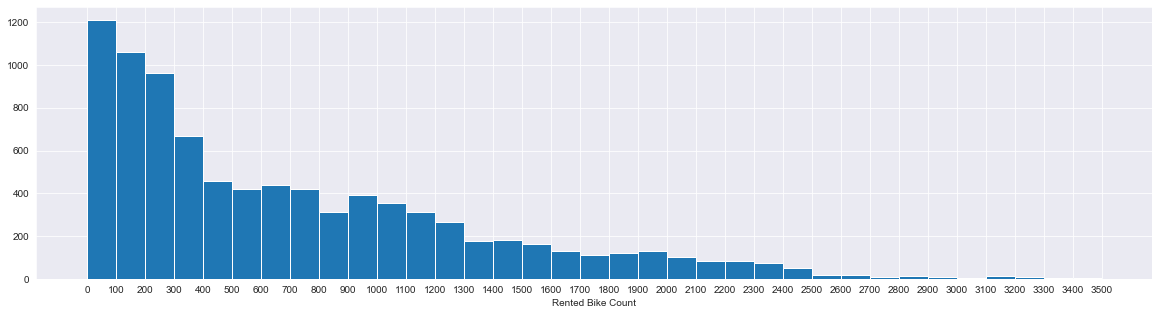

In [142]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
bins = np.arange(0, 3540, 100).tolist()
data['Rented Bike Count'].hist(bins=bins)
plt.xticks(bins)
plt.xlabel('Rented Bike Count')

**Rented Bike Count vs Season**

In [143]:
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

*Box plot of Rented Bike Count vs Seasons*

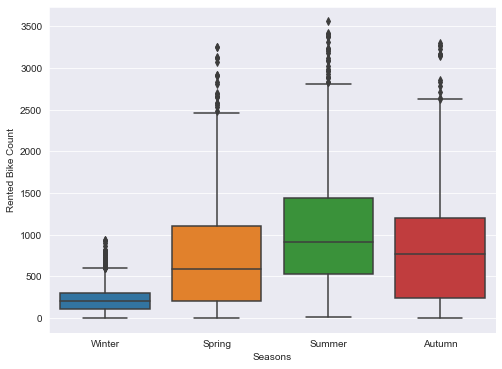

In [144]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Seasons'], y=data['Rented Bike Count'])
plt.show()

**Rented Bike Count vs Holiday**

*Box plot of Rented Bike Count vs Holiday*

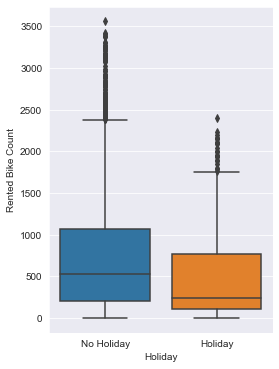

In [145]:
plt.figure(figsize=(4, 6))
sns.boxplot(x=data['Holiday'], y=data['Rented Bike Count'])
plt.show()

**Traffic Volume vs Temperature**

*Plot of Rented Bike Count vs Temperature*

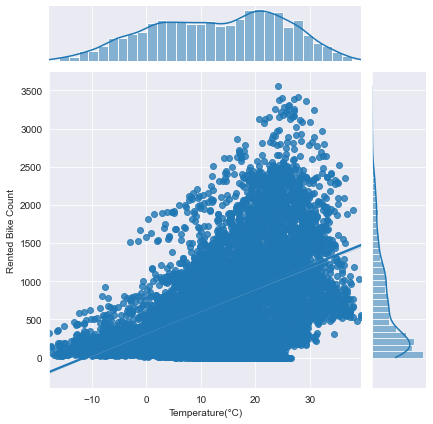

In [146]:
fig = sns.jointplot(x=data['Temperature(°C)'], y=data['Rented Bike Count'], kind='reg')

**Traffic Volume vs Rainfall**

*Plot of Rented Bike Count vs Rainfall*

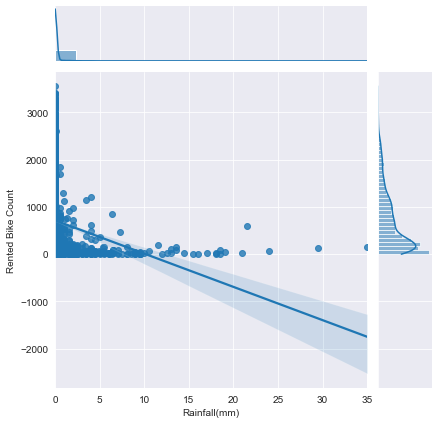

In [147]:
fig = sns.jointplot(x=data['Rainfall(mm)'], y=data['Rented Bike Count'], kind='reg')

*Removing outliers*

In [148]:
outliers = data[(data['Rainfall(mm)'] >= 20)]
data = data.drop(outliers.index)
data.index = np.arange(1, len(data) + 1)
outliers

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3997,16/05/2018,151,13,21.8,97,2.4,682,21.2,0.06,35.0,0.0,Spring,No Holiday,Yes
5034,28/06/2018,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes
5132,02/07/2018,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes
6501,28/08/2018,122,21,22.9,98,2.1,1146,22.5,0.00,29.5,0.0,Summer,No Holiday,Yes
6524,29/08/2018,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes


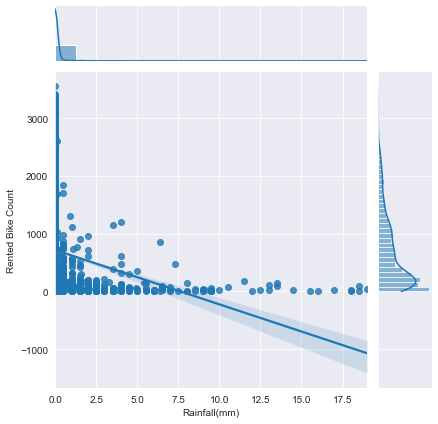

In [149]:
fig = sns.jointplot(x=data['Rainfall(mm)'], y=data['Rented Bike Count'], kind='reg')

**Traffic Volume vs Rainfall**

*Plot of Traffic Volume vs Wind Speed*

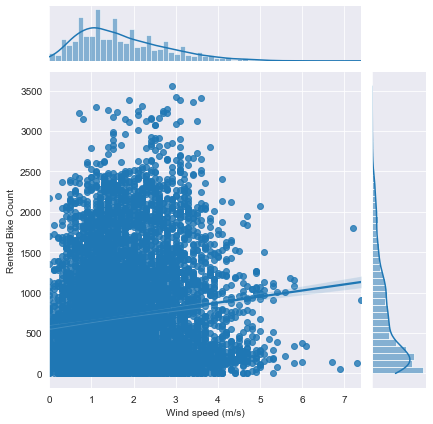

In [150]:
fig = sns.jointplot(data=data, x="Wind speed (m/s)", y="Rented Bike Count", kind='reg')

*Removing outliers*

In [151]:
outliers = data[(data['Wind speed (m/s)'] >6)]
data = data.drop(outliers.index)
data.index = np.arange(1, len(data) + 1)
outliers

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
934,08/01/2018,146,21,0.7,77,6.7,692,-2.8,0.0,0.9,1.0,Winter,No Holiday,Yes
3135,10/04/2018,913,14,21.2,35,7.4,1992,5.1,1.8,0.0,0.0,Spring,No Holiday,Yes
3139,10/04/2018,1805,18,19.7,52,7.2,2000,9.5,0.2,0.0,0.0,Spring,No Holiday,Yes
3141,10/04/2018,336,20,19.1,58,6.1,2000,10.6,0.0,0.0,0.0,Spring,No Holiday,Yes
3142,10/04/2018,133,21,17.5,70,7.3,1634,11.9,0.0,0.5,0.0,Spring,No Holiday,Yes
6314,21/08/2018,49,4,25.3,70,6.9,925,19.4,0.0,0.4,0.0,Summer,No Holiday,Yes


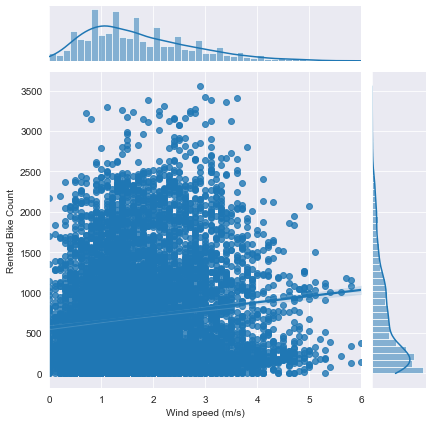

In [152]:
fig = sns.jointplot(data=data, x="Wind speed (m/s)", y="Rented Bike Count", kind='reg')

**Traffic Volume vs Snowfall**

*Plot of Traffic Volume vs Snowfall*

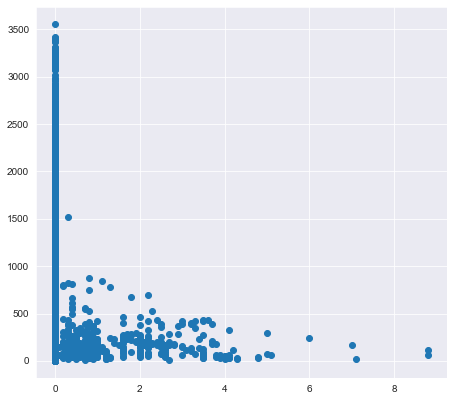

In [153]:
fig = plt.figure(figsize = (25,15))
ax1 = fig.add_subplot(2,3,1)
ax1.scatter(data=data, x="Snowfall (cm)", y="Rented Bike Count")

*Distribution only with snowy days*

In [154]:
data_snowy = data.loc[(data['Snowfall (cm)'] > 0)]
#data_snowy = data.loc[(data['weather_main'] == "Snow")]
data_snowy.index = np.arange(1, len(data_snowy) + 1)
data_snowy

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1,06/12/2017,145,0,-2.8,77,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes
2,06/12/2017,144,1,-3.0,79,0.0,293,-6.1,0.00,0.0,0.3,Winter,No Holiday,Yes
3,06/12/2017,117,2,-3.0,79,0.0,1862,-6.1,0.00,0.0,0.4,Winter,No Holiday,Yes
4,06/12/2017,78,3,-3.2,78,0.0,1808,-6.4,0.00,0.2,0.4,Winter,No Holiday,Yes
5,06/12/2017,58,4,-3.4,75,0.0,1982,-7.2,0.00,0.0,0.4,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,26/11/2018,115,5,2.1,88,1.4,323,0.3,0.00,0.0,0.3,Autumn,No Holiday,Yes
439,26/11/2018,339,6,1.8,88,1.1,313,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes
440,26/11/2018,819,7,1.7,89,1.3,295,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes
441,26/11/2018,1524,8,2.0,84,1.1,396,-0.4,0.03,0.0,0.3,Autumn,No Holiday,Yes


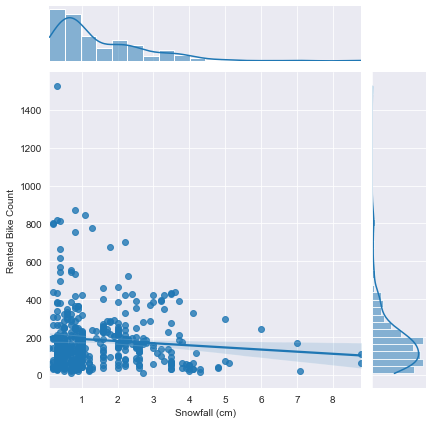

In [155]:
fig = sns.jointplot(data=data_snowy, x="Snowfall (cm)", y="Rented Bike Count", kind='reg')

**Traffic Volume vs Hour**

*Plot of Traffic Volume vs Hour*

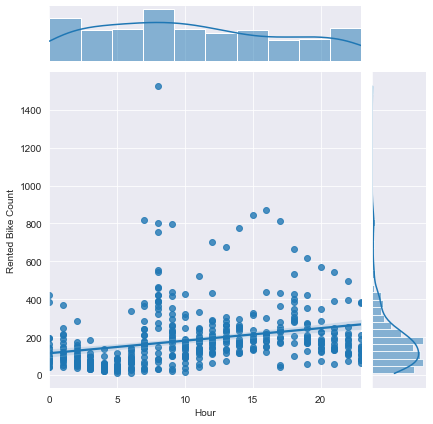

In [156]:
fig = sns.jointplot(data=data_snowy, x="Hour", y="Rented Bike Count", kind='reg')

**Feature Engineering on Date**

In [157]:
data[['Day','Month','Year']] = data['Date'].str.extract('(\d+)/(\d+)/(\d+)', expand=True)
data = data.drop(['Date'], axis=1)

**Visualization**

*Bike Count vs Year*

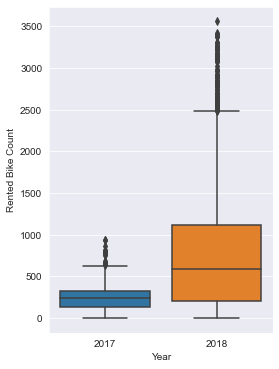

In [158]:
plt.figure(figsize=(4, 6))
sns.boxplot(x=data['Year'], y=data['Rented Bike Count'])
plt.show()

*Bike Count vs Year*

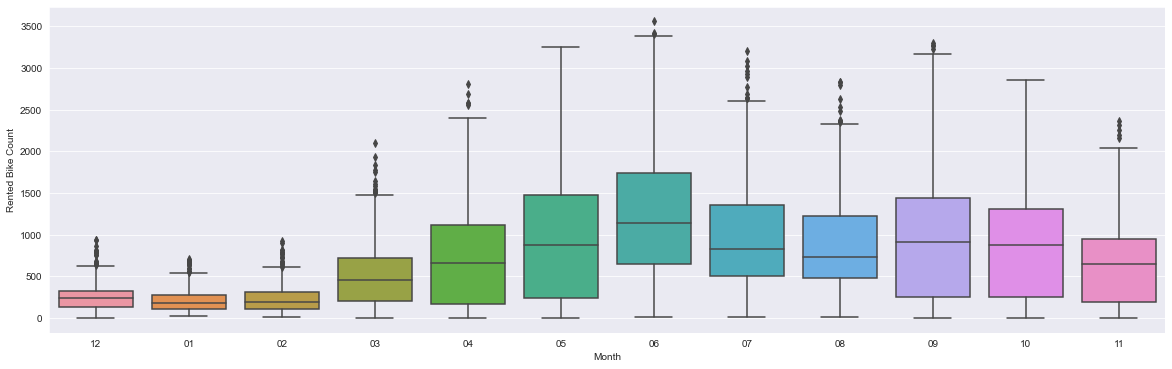

In [159]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['Month'], y=data['Rented Bike Count'])
plt.show()

*Rented Bike Count vs Hour*

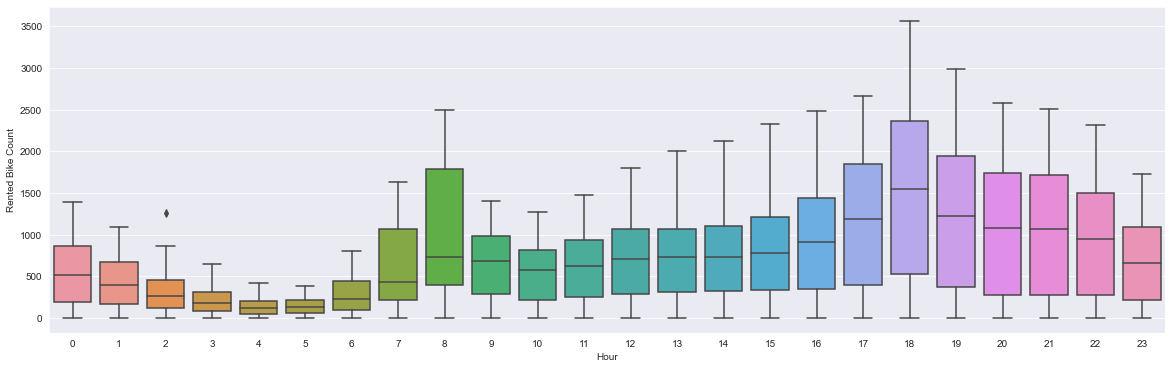

In [160]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['Hour'], y=data['Rented Bike Count'])
plt.show()

## Data Preprocessing

*Preprocess Binary Data*

In [161]:
data = data.replace(to_replace=['No Holiday', 'Holiday'], value=['0', '1'])
data = data.replace(to_replace=['No', 'Yes'], value=['0', '1'])


*Preprocess Non Ordinal Data*

In [162]:
one_hot = pd.get_dummies(data["Seasons"])
data = data.drop("Seasons",axis = 1)
data = data.join(one_hot)

In [163]:
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

In [164]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

#split the data in attributes and class as well as training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Regression Tasks

*Regression Algorithms from Sklearn*

### Linear Regression

In [165]:
model = linear_model.LinearRegression().fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficients: 
 [ 2.72206357e+01  1.84271648e+01 -1.01647143e+01  2.31376597e+01
  4.86457019e-03  9.14251024e+00 -7.99881352e+01 -7.91474319e+01
  2.59454394e+01 -1.32466469e+02  9.60135536e+02 -1.34529272e+00
 -3.79755083e+01 -4.78424327e+02  3.37175657e+02 -2.08319424e+01
  6.07414602e+01 -3.77085175e+02]
Coefficient of determination: 0.56
Mean Absolute Error: 317.5305942016622
Mean Squared Error: 179621.9107829553
Root Mean Squared Error: 423.81825206443773


### KNN Regression

In [166]:
model = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficient of determination: 0.53
Mean Absolute Error: 294.8146031746032
Mean Squared Error: 192513.35242328042
Root Mean Squared Error: 438.7634356042905


*Our Regression Algorithms*

### Linear Regression Function

In [167]:
print('==================================================')

alpha = [500, 500, 500, 500]
alphaMethod = 'const'
mu = 1
weights, score = linearRegression.linearRegression(X, y, alpha = alpha, mu = mu, convergenceCriterion = 1e-9, 
                                  lossFunction = 'MSE', alphaMethod = alphaMethod, printOutput = True)
yPred = predictLinearRegression(X, weights)
#print('yPred = ', yPred)
print('weights = ', weights)
print('score = ', score)

print('==================================================')

Initial weights =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


TypeError: can't multiply sequence by non-int of type 'float'